# Lasso Regression 
Lasso regression (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that uses L1 regularization. Lasso regression adds a penalty term to the ordinary least squares objective function, which penalizes the absolute magnitude of the coefficients.
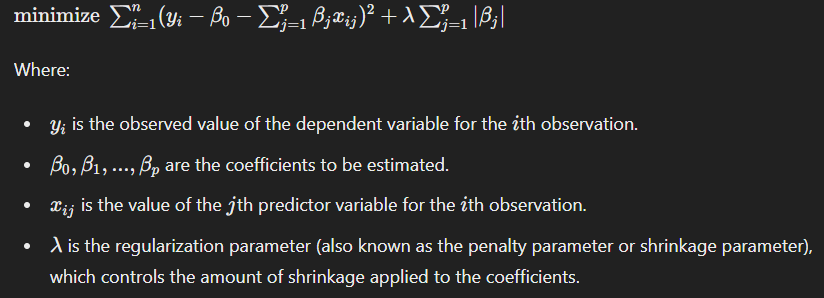

In [1]:
import numpy as np

class LassoRegression:
    def __init__(self, learning_rate=1.0e-2, epochs=1000, l1_penalty=1, random_state=None):
        """
        Initialize Lasso Regression model.

        Parameters:
        learning_rate (float): The learning rate for gradient descent.
        epochs (int): The number of iterations for gradient descent.
        l1_penalty (float): The regularization strength (lambda) for L1 regularization.
        random_state (int): Seed for random number generator for reproducibility.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.l1_penalty = l1_penalty
        self.coef = None  # Coefficients (weights) of the model
        self.intercept = None  # Intercept of the model
        
    def fit(self, X, y):
        """
        Fit the Lasso Regression model to the training data.

        Parameters:
        X (numpy.ndarray): The feature matrix of shape (n_samples, n_features).
        y (numpy.ndarray): The target values of shape (n_samples,).

        Returns:
        self: Returns an instance of self.
        """
        self.m, self.n = X.shape  # Number of samples and features
        self.W = np.random.randn(self.n)  # Initialize weights randomly
        self.X = X  # Feature matrix
        self.y = y  # Target values
        self.b = 0  # Initialize bias term
        
        for i in range(self.epochs):  # Iterate through epochs
            self.update_weights()  # Update weights using gradient descent
        return self
    
    def update_weights(self):
        """
        Update weights using gradient descent with L1 regularization.

        Returns:
        self: Returns an instance of self.
        """
        y_pred = self.predict(self.X)  # Predicted values
        
        # Calculate gradients
        dW = (-2 * self.X.T.dot(self.y - y_pred) + self.l1_penalty * np.sign(self.W)) / self.m
        db = -2 * np.sum(self.y - y_pred) / self.m
        
        # Update weights and bias term
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db
        return self
    
    def predict(self, X):
        """
        Predict target values.

        Parameters:
        X (numpy.ndarray): The feature matrix of shape (n_samples, n_features).

        Returns:
        numpy.ndarray: Predicted target values of shape (n_samples,).
        """
        return X.dot(self.W) + self.b  # Linear combination of features and weights, plus bias term


In [2]:
if __name__ == '__main__':
    
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)  # Generate random input feature with one feature
    y = 4 + 3 * X[:,0] + np.random.randn(100)  # Generate target values with some random noise

    # Instantiate and fit the model
    model = LassoRegression(learning_rate=0.01, epochs=1000, l1_penalty=0.1)
    model.fit(X, y)

    # Predict
    predictions = model.predict(X)

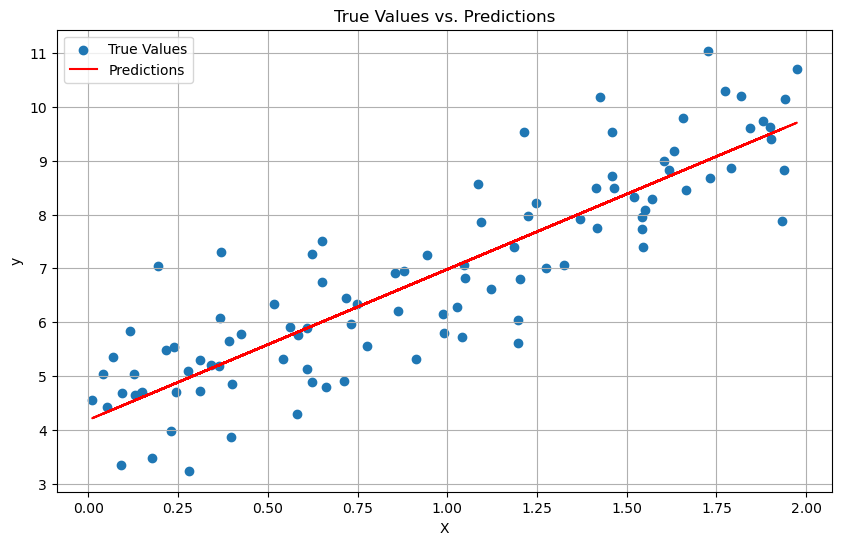

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='True Values')
plt.plot(X, predictions, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('True Values vs. Predictions')
plt.legend()
plt.grid(True)
plt.show()


### Scikit-Learn Library

Mean Squared Error: 0.8227334057463739


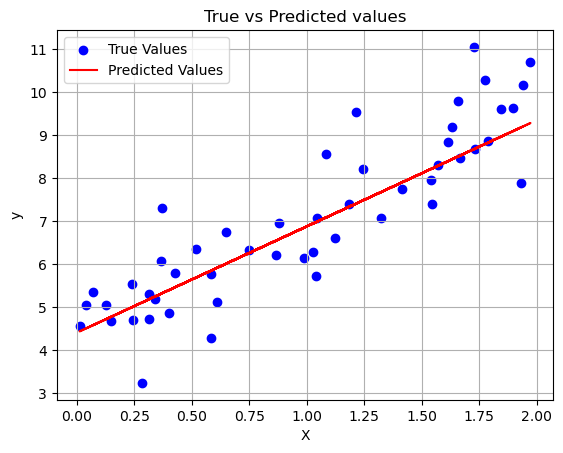

In [4]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Generate random input feature with one feature
y = 4 + 3 * X[:,0] + np.random.randn(100)  # Generate target values with some random noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization strength via the alpha parameter

# Train the model
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting true values against predicted values
plt.scatter(X_test, y_test, color='blue', label='True Values')
plt.plot(X_test, y_pred, color='red', label='Predicted Values')
plt.xlabel("X")
plt.ylabel("y")
plt.title("True vs Predicted values")
plt.legend()
plt.grid(True)
plt.show()
